In [1]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson  
from scipy.interpolate import *
import seaborn as sns

In [2]:
matches = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\matches.csv')
matches.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
0,7109,7097,41196,1505559600,Finished,0,Levante,Valencia,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,468
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195


First of all we filtered the English Premier League matches which have finished status.
Then, drop the dublicated entries and check the information about the data to see any inconsistency.


In [3]:
LEAGUE_ID = 148
finished_matches = matches[matches.match_status == 'Finished']
english_finish_matches = finished_matches[finished_matches.league_id == LEAGUE_ID]
english_finish_matches.drop_duplicates(subset='match_id', keep='first')
english_finish_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 1 to 5059
Data columns (total 17 columns):
match_awayteam_id                618 non-null int64
match_hometeam_id                618 non-null int64
match_id                         618 non-null int64
epoch                            618 non-null int64
match_status                     618 non-null object
match_live                       618 non-null int64
match_hometeam_name              618 non-null object
match_awayteam_name              618 non-null object
match_hometeam_score             618 non-null float64
match_awayteam_score             618 non-null float64
match_hometeam_halftime_score    569 non-null float64
match_awayteam_halftime_score    569 non-null float64
match_hometeam_extra_score       569 non-null float64
match_awayteam_extra_score       569 non-null float64
match_hometeam_penalty_score     0 non-null float64
match_awayteam_penalty_score     0 non-null float64
league_id                        618 non-null i

# Task 1

To calculate bins, draw histograms and define poisson random variables we need to calculate values and the mean values of 
hometeam score and away team score respectively. In addition we calculated the home team score - away team score.

In [58]:
hometeam_score = english_finish_matches.match_hometeam_score
hometeam_score_mean = np.mean(hometeam_score)

awayteam_score = english_finish_matches.match_awayteam_score
awayteam_score_mean = np.mean(awayteam_score)

home_away_score = english_finish_matches.match_hometeam_score- english_finish_matches.match_awayteam_score


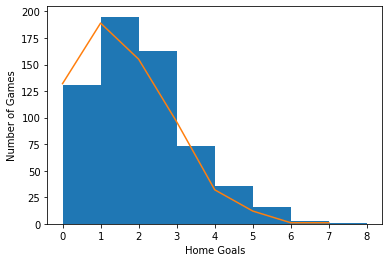

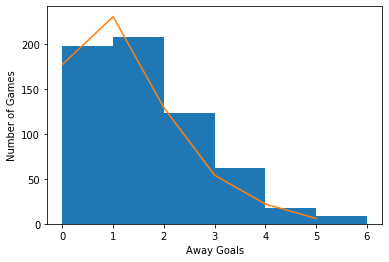

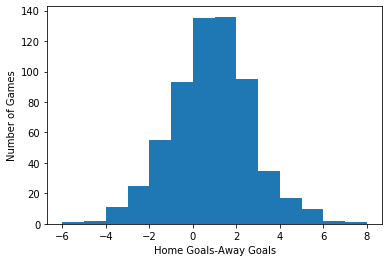

In [59]:
bin = int(max(hometeam_score))
range_min = int(min(hometeam_score)) 
plt.hist(hometeam_score,bins=bin)
poissonpmf = np.histogram(np.random.poisson(lam = hometeam_score_mean, size = hometeam_score.size),bins=bin,range=(range_min,bin))
plt.plot(poissonpmf[0])
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')
plt.show()


bin2 = int(max(awayteam_score))
range_min2 = int(min(awayteam_score)) 
plt.hist(awayteam_score,bins=bin2)
poisson_pmf2 = np.histogram(np.random.poisson(lam = awayteam_score_mean, size = awayteam_score.size),bins=bin2,range=(range_min2,bin2))
plt.plot(poisson_pmf2[0])
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')
plt.show()

bin3 = int(max(home_away_score)) - int(min(home_away_score))
plt.hist(home_away_score,bins=bin3)
plt.xlabel('Home Goals-Away Goals')
plt.ylabel('Number of Games')
plt.show()


Distribution of home and away goals fitting well to the poisson distribution as seen in first two graphs.

# Task 2

In order to find the most useful sample, let us count the bets that bookmakers put for matches. 
Then, chose 4 bookmakers having the maximum number of bets.

In [7]:
bets = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\bets.csv')
bookmaker_count = bets.groupby(['odd_bookmakers']).count()
bookmaker_count.sort_values(['match_id'])

,match_id,odd_epoch,variable,value
odd_bookmakers,,,,
betcart,56,56,56,56
Guts,64,64,64,64
Planetwin,131,131,131,131
Bovada,141,141,141,141
Sportium,174,174,174,174
Kto.com,377,377,377,377
BetCity,470,470,470,470
BetOnline,1113,1113,1113,1113
DOXXbet,1300,1300,1300,1300


Fİrst of all we need to join the score information to the bets.
Then, filter the chosen bookmakers and European style bets.
Let us assume that the latest odd given by the bookmaker will be valid.
Also, any odd with the value less than 1 will not be meaningfull.so these values are filtered out as well.
For data cleaning purposes, lastly, we drop null and dublicate entries.

In [8]:
bets_matches = pnd.merge(bets,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='inner')
 
bets_bookmaker = ['1xBet','18bet','Marathonbet','bet365']
bets_variable = ['odd_1','odd_x','odd_2']

bets_matches_bookmaker = bets_matches[bets_matches.odd_bookmakers.isin(bets_bookmaker)]  

bets_data = bets_matches_bookmaker[bets_matches_bookmaker.variable.isin(bets_variable)]
bets_data = bets_data.loc[bets_data.groupby(['match_id','odd_bookmakers','variable'])['odd_epoch'].agg(pnd.Series.idxmax)]
bets_data_pivot_unfiltered = pnd.pivot_table(bets_data,index=['match_id','odd_bookmakers','odd_epoch'] ,columns='variable',values='value').reset_index()

bets_data_pivot1= bets_data_pivot_unfiltered[(bets_data_pivot_unfiltered.odd_1>=1.00)] 
bets_data_pivot2=bets_data_pivot1[(bets_data_pivot1.odd_2>=1.00)]
bets_data_pivot=bets_data_pivot2[(bets_data_pivot2.odd_x>=1.00)]

bets_data_pivot['P(home win)'] = 1/bets_data_pivot['odd_1']
bets_data_pivot['P(away win)'] = 1/bets_data_pivot['odd_2']   
bets_data_pivot['P(tie)'] = 1/bets_data_pivot['odd_x']    

bets_data_pivot.dropna()

bets_data_pivot.drop_duplicates(subset=['match_id','odd_epoch','odd_bookmakers'], keep='first')

bets_data_pivot = pnd.merge(bets_data_pivot,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='left')

bets_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081 entries, 0 to 1080
Data columns (total 11 columns):
match_id                1081 non-null int64
odd_bookmakers          1081 non-null object
odd_epoch               1081 non-null int64
odd_1                   1081 non-null float64
odd_2                   1081 non-null float64
odd_x                   1081 non-null float64
P(home win)             1081 non-null float64
P(away win)             1081 non-null float64
P(tie)                  1081 non-null float64
match_hometeam_score    1081 non-null float64
match_awayteam_score    1081 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 101.3+ KB


In [9]:
bets_data_pivot['Normalization_Value'] = (bets_data_pivot['P(home win)']+bets_data_pivot['P(away win)']+bets_data_pivot['P(tie)'])

bets_data_pivot['P(home win)_Normalized']=bets_data_pivot['P(home win)']/bets_data_pivot['Normalization_Value']
bets_data_pivot['P(away win)_Normalized']=bets_data_pivot['P(away win)']/bets_data_pivot['Normalization_Value']
bets_data_pivot['P(tie)_Normalized']=bets_data_pivot['P(tie)']/bets_data_pivot['Normalization_Value']

bets_data_pivot.head()

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,P(home win),P(away win),P(tie),match_hometeam_score,match_awayteam_score,Normalization_Value,P(home win)_Normalized,P(away win)_Normalized,P(tie)_Normalized
0,150842,1xBet,1486711421,5.10,1.77,3.70,0.196078,0.564972,0.270270,0.0,0.0,1.031320,0.190124,0.547814,0.262062
1,150842,Marathonbet,1486711421,5.20,1.75,3.70,0.192308,0.571429,0.270270,0.0,0.0,1.034007,0.185983,0.552635,0.261382
2,150844,1xBet,1486711426,3.09,2.46,3.30,0.323625,0.406504,0.303030,3.0,1.0,1.033159,0.313238,0.393457,0.293305
3,150844,Marathonbet,1486711426,3.10,2.44,3.30,0.322581,0.409836,0.303030,3.0,1.0,1.035447,0.311538,0.395806,0.292657
4,156845,18bet,1489826601,2.35,3.22,2.89,0.425532,0.310559,0.346021,2.0,0.0,1.082112,0.393242,0.286993,0.319764


In [10]:
bets_data_pivot["P(home win) - P(away win)"]=bets_data_pivot['P(home win)']-bets_data_pivot['P(away win)']
bets_data_pivot["P(home win)_Normalized - P(away win)_Normalized"]=bets_data_pivot['P(home win)_Normalized']-bets_data_pivot['P(away win)_Normalized']
bets_data_pivot.head()

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,P(home win),P(away win),P(tie),match_hometeam_score,match_awayteam_score,Normalization_Value,P(home win)_Normalized,P(away win)_Normalized,P(tie)_Normalized,P(home win) - P(away win),P(home win)_Normalized - P(away win)_Normalized
0,150842,1xBet,1486711421,5.10,1.77,3.70,0.196078,0.564972,0.270270,0.0,0.0,1.031320,0.190124,0.547814,0.262062,-0.368893,-0.357690
1,150842,Marathonbet,1486711421,5.20,1.75,3.70,0.192308,0.571429,0.270270,0.0,0.0,1.034007,0.185983,0.552635,0.261382,-0.379121,-0.366652
2,150844,1xBet,1486711426,3.09,2.46,3.30,0.323625,0.406504,0.303030,3.0,1.0,1.033159,0.313238,0.393457,0.293305,-0.082879,-0.080219
3,150844,Marathonbet,1486711426,3.10,2.44,3.30,0.322581,0.409836,0.303030,3.0,1.0,1.035447,0.311538,0.395806,0.292657,-0.087255,-0.084268
4,156845,18bet,1489826601,2.35,3.22,2.89,0.425532,0.310559,0.346021,2.0,0.0,1.082112,0.393242,0.286993,0.319764,0.114973,0.106249


C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


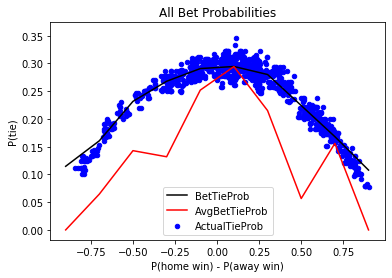

In [51]:
average_bet_tie = [0] * 10
average_bet_tie_normalized = [0] * 10
x = [0] * 10
actual_tie = [0] * 10
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot[(bets_data_pivot['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    bets_data_pivot_array2 = bets_data_pivot[(bets_data_pivot['P(home win)_Normalized - P(away win)_Normalized'] > ((i*0.2)-1)) & (bets_data_pivot['P(home win)_Normalized - P(away win)_Normalized'] <= ((i*0.2)-0.8))]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    average_bet_tie_normalized[i] = bets_data_pivot_array2.sum()['P(tie)_Normalized']/bets_data_pivot_array2.shape[0]
    x[i] = ((i*0.2)-0.9)

bets_data_pivot.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('All Bet Probabilities',loc='center')
plt.show()

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


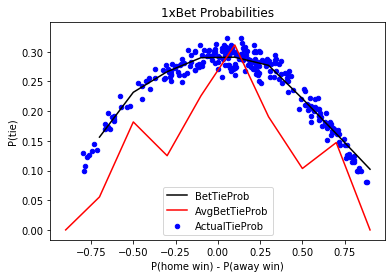

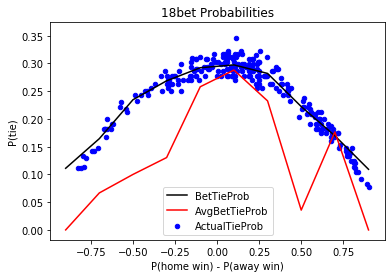

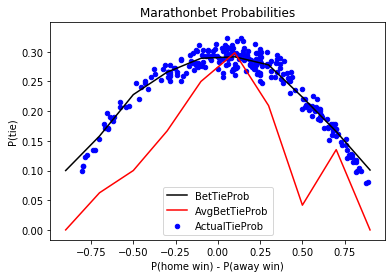

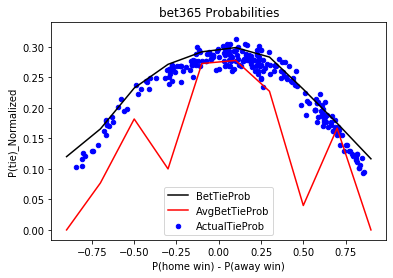

In [60]:
bets_data_pivot_1xbet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '1xBet']
bets_data_pivot_tempobet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '18bet']
bets_data_pivot_tipico = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Marathonbet']
bets_data_pivot_betsson = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'bet365']
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_1xbet[(bets_data_pivot_1xbet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_1xbet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_1xbet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('1xBet Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tempobet[(bets_data_pivot_tempobet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tempobet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tempobet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('18bet Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tipico[(bets_data_pivot_tipico['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tipico['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tipico.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('Marathonbet Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_betsson[(bets_data_pivot_betsson['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_betsson['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_betsson.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)_Normalized',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('bet365 Probabilities',loc='center')
plt.show()


In general,bookmakers estimated the draw probability relatively good when they see the winning probability of two teams similar. However, they couldn't catch the real probability in other cases.   

# Task 3

In [61]:
goals = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\goals.csv')
goals.head()
booking = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\booking.csv')
booking = booking[booking['match_id'].isin(english_finish_matches['match_id'].values)]
booking.head()

,match_id,time,home_fault,card,away_fault
0,13327,90+3,Can E.,yellow card,NaN
1,13329,29,Holebas J.,yellow card,NaN
2,13329,40,Doucoure A.,yellow card,NaN
3,13331,33,Cabaye Y.,yellow card,NaN
4,13331,50,Puncheon J.,yellow card,NaN


In [62]:
goals.describe()

,match_id
count,11825.000000
mean,146717.666808
std,70994.463443
min,13274.000000
25%,78706.000000
50%,154738.000000
75%,203854.000000
max,317909.000000


In [63]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 5 columns):
match_id       11825 non-null int64
time           11825 non-null object
home_scorer    6744 non-null object
score          11825 non-null object
away_scorer    5045 non-null object
dtypes: int64(1), object(4)
memory usage: 462.0+ KB


Let us start with eliminating the red card bookings in the first 15 minutes.

In [68]:
booking_filtered = booking[(booking['card'] == 'red card')]
booking_filtered = booking_filtered[((booking_filtered['time']).str)[0:2].astype(int) <= 15]
booking_filtered.head()

,match_id,time,home_fault,card,away_fault
436,13422,15,NaN,red card,Coady C.
5681,83075,15,NaN,red card,Mavropanos K.
11037,186626,4,NaN,red card,Maguire H.
12094,200965,11,Deeney T.,red card,NaN


In order to find the find the goals after 90 minutes, we join the goals information with the matches data and filter these maches.

In [24]:
matches_goals_unfiltered = pnd.merge(goals,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='inner')
matches_goals = matches_goals_unfiltered[((matches_goals_unfiltered['time']).str)[0:2].astype(int) == 90]
matches_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 5 to 1398
Data columns (total 7 columns):
match_id                65 non-null int64
time                    65 non-null object
home_scorer             33 non-null object
score                   65 non-null object
away_scorer             32 non-null object
match_hometeam_score    65 non-null float64
match_awayteam_score    65 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ KB


In [25]:
matches_goals.sort_values(by=['match_id', 'time'])

,match_id,time,home_scorer,score,away_scorer,match_hometeam_score,match_awayteam_score
57,13278,90+7,Zaha W.,2 - 2,NaN,2.0,2.0
54,13284,90+3,Niasse O.,2 - 4,NaN,2.0,5.0
48,13291,90+5,Batshuayi M.,4 - 2,NaN,4.0,2.0
30,13296,90+2,Cleverley T.,2 - 1,NaN,2.0,1.0
5,13323,90+2,Martial A.,4 - 0,NaN,4.0,0.0
81,55248,90,Baines L.,3 - 2,NaN,3.0,2.0
112,63001,90+2,NaN,0 - 1,Sanchez A.,0.0,1.0
131,63572,90+6,Sterling R.,2 - 1,NaN,2.0,1.0
147,66081,90+2,McArthur J.,2 - 1,NaN,2.0,1.0
159,66509,90+4,NaN,0 - 3,Sako B.,0.0,3.0


We found the 90 and 90 + goals that change the ending status of matches. 

In [26]:
match_goals_home = matches_goals[~matches_goals['home_scorer'].isnull() & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'] + 1)]
match_goals_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 30 to 1390
Data columns (total 7 columns):
match_id                10 non-null int64
time                    10 non-null object
home_scorer             10 non-null object
score                   10 non-null object
away_scorer             0 non-null object
match_hometeam_score    10 non-null float64
match_awayteam_score    10 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 640.0+ bytes


In [69]:
match_goals_away = matches_goals[~matches_goals['away_scorer'].isnull() & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'] - 1)]
match_goals_away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 112 to 1237
Data columns (total 7 columns):
match_id                7 non-null int64
time                    7 non-null object
home_scorer             0 non-null object
score                   7 non-null object
away_scorer             7 non-null object
match_hometeam_score    7 non-null float64
match_awayteam_score    7 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 448.0+ bytes


In [28]:
match_goals_tie = matches_goals[(~matches_goals['away_scorer'].isnull() | ~matches_goals['home_scorer'].isnull() ) & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'])]
match_goals_tie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 57 to 1348
Data columns (total 7 columns):
match_id                12 non-null int64
time                    12 non-null object
home_scorer             7 non-null object
score                   12 non-null object
away_scorer             5 non-null object
match_hometeam_score    12 non-null float64
match_awayteam_score    12 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 768.0+ bytes


In total we eliminated 4 match Ids with red card bookings at the beginning, 10 matches that ended as home team winning,  7 matches that ended as home team winning,  12 matches that ended as draw. In total, 33 match Ids are eliminated as noise entry.

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


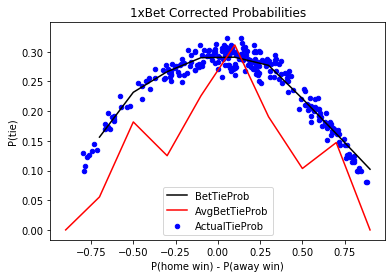

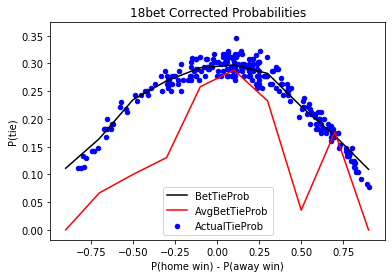

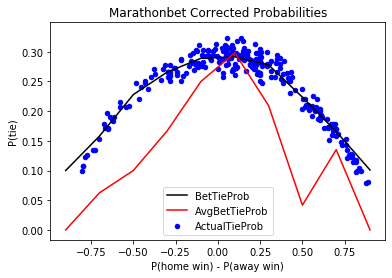

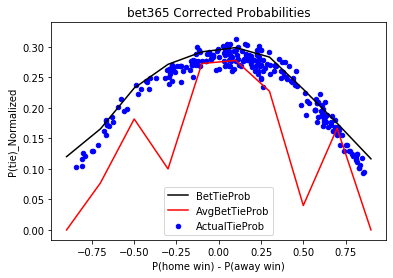

In [54]:
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(booking_filtered['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_home['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_away['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_tie['match_id'])]

bets_data_pivot_1xbet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '1xBet']
bets_data_pivot_tempobet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '18bet']
bets_data_pivot_tipico = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Marathonbet']
bets_data_pivot_betsson = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'bet365']
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_1xbet[(bets_data_pivot_1xbet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_1xbet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_1xbet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('1xBet Corrected Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tempobet[(bets_data_pivot_tempobet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tempobet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tempobet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('18bet Corrected Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tipico[(bets_data_pivot_tipico['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tipico['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tipico.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('Marathonbet Corrected Probabilities',loc='center')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_betsson[(bets_data_pivot_betsson['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_betsson['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_betsson.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)_Normalized',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.legend(loc='lower center', labels=['BetTieProb','AvgBetTieProb','ActualTieProb'])
plt.title('bet365 Corrected Probabilities',loc='center')
plt.show()


After eliminating those noisy matches, the probability calculations gets closer to real status. Yet, the overall bias in odds are not changing. 